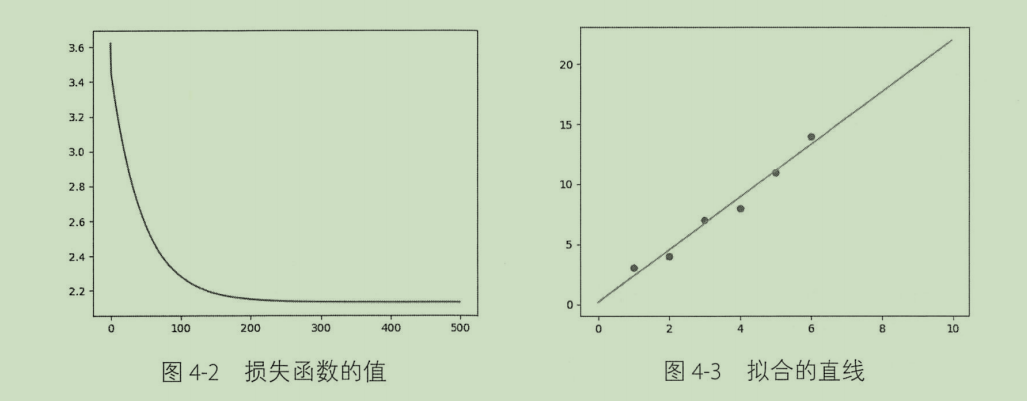

(1.91, 1.2)
(2.055096, 0.75369716)
(2.1164339, 0.4910968)
(2.1518073, 0.3396554)
(2.1722074, 0.2523191)
(2.1839721, 0.20195228)
(2.1907568, 0.17290573)
(2.1946695, 0.1561547)
(2.1969259, 0.14649433)
(2.1982272, 0.14092326)


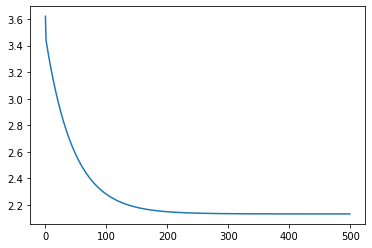

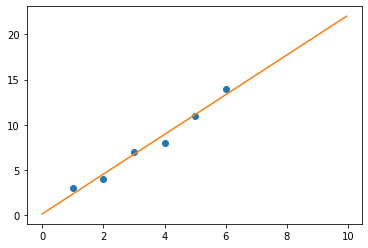

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#6个点的横坐标
x=tf.constant([1,2,3,4,5,6],tf.float32)
#6个点的纵坐标
y=tf.constant([3,4,7,8,11,14],tf.float32)
#初始化直线的梯度
w=tf.Variable(1.0,dtype=tf.float32)
#初始化直线的截距
b=tf.Variable(1.0,dtype=tf.float32)
#6个点到直线沿y轴方向距离的平方和
loss=tf.reduce_sum(tf.square(y - (w*x + b)))
#创建会话
session=tf.Session()
session.run(tf.global_variables_initializer())

#梯度下降法
opti=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

#记录每一次迭代后的平均误差
MSE=[]

# 500次
for i in range(500):
    session.run(opti)
    MSE.append(session.run(loss))
    # 每隔50次打印直线的w, b
    if i%50 == 0:
        print((session.run(w), session.run(b)))

             
# 画出损失函数的值
plt.figure(1)
plt.plot(MSE)
plt.show()

#画出6个点及最后计算出的直线
plt.figure(2)
x_array,y_array=session.run([x,y])
plt.plot(x_array,y_array,'o')
xx=np.arange(0,10,0.05)
yy=session.run(w)*xx + session.run(b)
plt.plot(xx,yy)
plt.show()